In [38]:
import pandas as pd
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load your preprocessed data

In [33]:
X = pd.read_csv('../data/model_input.csv')
X.head(3)

,PATIENT,AGE,GENDER,label
0,1ff7f10f-a204-4bb1-aa72-dd763fa99482,5,M,False
1,9bcf6ed5-d808-44af-98a0-7d78a29ede72,6,F,False
2,5163c501-353c-4a82-b863-a3f1df2d6cf1,18,F,False


In [34]:
# convert non-numeric columns to numeric
X['GENDER'] = X['GENDER'].astype('category')
X['GENDER'] = X['GENDER'].cat.codes
X

,PATIENT,AGE,GENDER,label
0,1ff7f10f-a204-4bb1-aa72-dd763fa99482,5,1,False
1,9bcf6ed5-d808-44af-98a0-7d78a29ede72,6,0,False
2,5163c501-353c-4a82-b863-a3f1df2d6cf1,18,0,False
3,cc3c806f-4a09-4a89-a990-4286450956be,26,1,False
4,bd1c4ffc-7f1d-4590-adbb-1d6533fb623e,3,0,False
...,...,...,...,...
124145,1ecfda69-7afc-4417-8a6f-c00be1be96dc,88,1,True
124146,8cf835a7-f161-4fe9-a559-350c97a3450e,78,1,False
124147,503d768f-481c-46e2-bcdb-a6116686351a,88,1,False
124148,2599e9d9-ca59-44ec-a28c-9eae219f162d,88,1,True


# Split your dataset into training (70%) and testing (30%)

In [35]:
# specify the columns we will use to train the model
exclude_columns = ['PATIENT', 'label']
include_columns = [col for col in X.columns if col not in exclude_columns]

# set a random state to ensure reproducibility
random_state = 1

X_train, X_test, y_train, y_test = train_test_split(X[include_columns], X['label'], test_size=0.30, random_state=random_state)

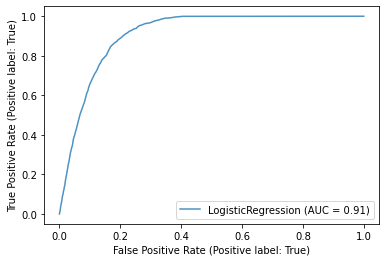

In [51]:
# Train a logistic regression model with default settings
lr = LogisticRegression(random_state=random_state)
lr.fit(X_train, y_train)
#y_pred_lr = lr.decision_function(X_test)
#RocCurveDisplay.from_predictions(y_test, y_pred_lr)
RocCurveDisplay.from_estimator(lr, X_test, y_test, alpha=0.8)

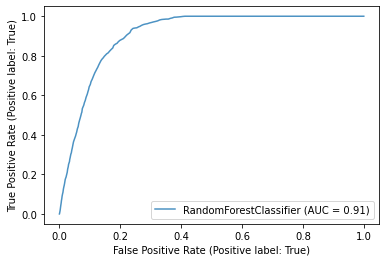

In [52]:
# Train a Random Forest model with default settings
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train, y_train)
RocCurveDisplay.from_estimator(rf, X_test, y_test, alpha=0.8)

In [ ]:
# compare